In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import tensorflow as tf 

In [2]:
mpl.rcParams['figure.figsize']=(10,8)
mpl.rcParams['axes.grid']=False

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
path="/content/drive/MyDrive/Colab Notebooks/merged_cycles (1).csv"
Data=pd.read_csv(path, delimiter='\t')
Data.describe()

,Line,Door_Status,Metal_Temp,Burner_Input,Current_Roof_Temp,Roof_Temp_SetPoint
count,13792.00000,13792.000000,1522.000000,13792.000000,13792.000000,13792.000000
mean,126829.40132,0.828741,667.093298,79.746475,883.501500,1050.557571
std,93717.20782,0.376749,182.088585,39.680669,215.167673,243.280163
min,3397.00000,0.000000,147.000000,0.000000,289.958984,100.000000
25%,25520.75000,1.000000,639.000000,99.936356,803.799408,1150.000000
50%,147593.50000,1.000000,717.000000,100.000000,938.700073,1150.000000
75%,187837.25000,1.000000,757.000000,100.000000,1052.166381,1150.000000
max,315012.00000,1.000000,1372.000000,100.000000,1180.774292,1150.000000


In [4]:
Data

,Line,DateTime,Door_Status,Metal_Temp,Burner_Input,Current_Roof_Temp,Roof_Temp_SetPoint
0,3397,21:21:00,0,NaN,0.0,808.205078,644.425354
1,3398,21:22:00,0,NaN,0.0,718.014282,644.425354
2,3399,21:23:00,0,NaN,0.0,657.406799,644.425354
3,3400,21:24:00,0,NaN,0.0,617.707275,644.425354
4,3401,21:25:00,0,NaN,0.0,589.156677,644.425354
...,...,...,...,...,...,...,...
13787,315008,07:41:00,1,NaN,100.0,1018.120605,1045.424683
13788,315009,07:42:00,1,NaN,100.0,1020.767090,1045.424683
13789,315010,07:43:00,1,NaN,100.0,1023.941895,1045.424683
13790,315011,07:44:00,1,NaN,100.0,1020.772583,1045.424683


In [5]:
data=Data.drop(['Line'], axis=1)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13792 entries, 0 to 13791
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   DateTime            13792 non-null  object 
 1   Door_Status         13792 non-null  int64  
 2   Metal_Temp          1522 non-null   float64
 3   Burner_Input        13792 non-null  float64
 4   Current_Roof_Temp   13792 non-null  float64
 5   Roof_Temp_SetPoint  13792 non-null  float64
dtypes: float64(4), int64(1), object(1)
memory usage: 646.6+ KB


In [7]:
#Converting datatime object into Datetime dtype
data['DateTime']=pd.to_datetime(data['DateTime'],infer_datetime_format=True)

In [8]:
data

,DateTime,Door_Status,Metal_Temp,Burner_Input,Current_Roof_Temp,Roof_Temp_SetPoint
0,2022-05-17 21:21:00,0,NaN,0.0,808.205078,644.425354
1,2022-05-17 21:22:00,0,NaN,0.0,718.014282,644.425354
2,2022-05-17 21:23:00,0,NaN,0.0,657.406799,644.425354
3,2022-05-17 21:24:00,0,NaN,0.0,617.707275,644.425354
4,2022-05-17 21:25:00,0,NaN,0.0,589.156677,644.425354
...,...,...,...,...,...,...
13787,2022-05-17 07:41:00,1,NaN,100.0,1018.120605,1045.424683
13788,2022-05-17 07:42:00,1,NaN,100.0,1020.767090,1045.424683
13789,2022-05-17 07:43:00,1,NaN,100.0,1023.941895,1045.424683
13790,2022-05-17 07:44:00,1,NaN,100.0,1020.772583,1045.424683


In [9]:
data['DateTime'].duplicated().sum()

12352

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f2dd720cd50>,
      dtype=object)

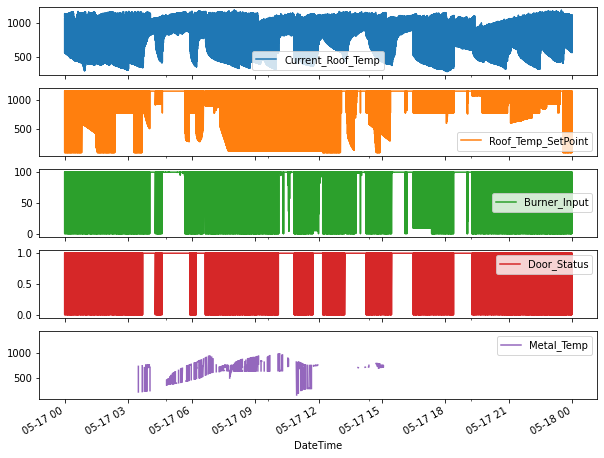

In [10]:
data.set_index('DateTime')[['Current_Roof_Temp','Roof_Temp_SetPoint','Burner_Input','Door_Status','Metal_Temp']].plot(subplots=True)

In [11]:
x=data.drop(['Metal_Temp'], axis=1) #axis=1 means we are working with columns and axis=0 means rows
y=data['Metal_Temp']

In [12]:
df_input=data[['Burner_Input','Door_Status','Current_Roof_Temp','Roof_Temp_SetPoint']]

In [13]:
df_input

,Burner_Input,Door_Status,Current_Roof_Temp,Roof_Temp_SetPoint
0,0.0,0,808.205078,644.425354
1,0.0,0,718.014282,644.425354
2,0.0,0,657.406799,644.425354
3,0.0,0,617.707275,644.425354
4,0.0,0,589.156677,644.425354
...,...,...,...,...
13787,100.0,1,1018.120605,1045.424683
13788,100.0,1,1020.767090,1045.424683
13789,100.0,1,1023.941895,1045.424683
13790,100.0,1,1020.772583,1045.424683


In [14]:
df_input.describe()

,Burner_Input,Door_Status,Current_Roof_Temp,Roof_Temp_SetPoint
count,13792.000000,13792.000000,13792.000000,13792.000000
mean,79.746475,0.828741,883.501500,1050.557571
std,39.680669,0.376749,215.167673,243.280163
min,0.000000,0.000000,289.958984,100.000000
25%,99.936356,1.000000,803.799408,1150.000000
50%,100.000000,1.000000,938.700073,1150.000000
75%,100.000000,1.000000,1052.166381,1150.000000
max,100.000000,1.000000,1180.774292,1150.000000


In [15]:
df_input.query("Current_Roof_Temp > 800")


,Burner_Input,Door_Status,Current_Roof_Temp,Roof_Temp_SetPoint
0,0.000000,0,808.205078,644.425354
80,99.977623,1,828.477417,1150.000000
81,99.977623,1,802.197510,1150.000000
83,100.000000,1,844.265137,1150.000000
85,100.000000,1,812.632324,1150.000000
...,...,...,...,...
13787,100.000000,1,1018.120605,1045.424683
13788,100.000000,1,1020.767090,1045.424683
13789,100.000000,1,1023.941895,1045.424683
13790,100.000000,1,1020.772583,1045.424683


In [16]:
scaler=MinMaxScaler()
data_scaled=scaler.fit_transform(df_input)


In [17]:
data_scaled

array([[0.        , 0.        , 0.58176604, 0.51850034],
       [0.        , 0.        , 0.48052082, 0.51850034],
       [0.        , 0.        , 0.41248485, 0.51850034],
       ...,
       [1.        , 1.        , 0.8239451 , 0.90040446],
       [1.        , 1.        , 0.82038734, 0.90040446],
       [1.        , 1.        , 0.81504404, 0.90040446]])

In [18]:
features=data_scaled


In [38]:
generator=TimeseriesGenerator(features,y,length=2,sampling_rate=1,batch_size=1,stride=2)[0]

In [39]:
generator

(array([[[0.        , 0.        , 0.58176604, 0.51850034],
         [0.        , 0.        , 0.48052082, 0.51850034]]]), array([nan]))

In [40]:
x_train, x_test, y_train, y_test=train_test_split(features,y,test_size=0.33, random_state=42,shuffle=False)


In [41]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((9240, 4), (4552, 4), (9240,), (4552,))

In [47]:
print(y_test.index.min())

9240


In [48]:
y_test = y_test.copy().reset_index(drop=True)

In [51]:
print(y_test.index.min())

0


In [42]:
win_length=20
batch_size=32
num_features=4
train_generator= TimeseriesGenerator(x_train,y_train,length=win_length,sampling_rate=1,batch_size=batch_size)
test_generator= TimeseriesGenerator(x_test,y_test,length=win_length,sampling_rate=1,batch_size=batch_size)

In [43]:
train_generator[0]

(array([[[0.        , 0.        , 0.58176604, 0.51850034],
         [0.        , 0.        , 0.48052082, 0.51850034],
         [0.        , 0.        , 0.41248485, 0.51850034],
         ...,
         [0.        , 0.        , 0.20679655, 0.64761905],
         [0.        , 0.        , 0.20293368, 0.64761905],
         [0.        , 0.        , 0.19730783, 0.64761905]],
 
        [[0.        , 0.        , 0.48052082, 0.51850034],
         [0.        , 0.        , 0.41248485, 0.51850034],
         [0.        , 0.        , 0.36791946, 0.51850034],
         ...,
         [0.        , 0.        , 0.20293368, 0.64761905],
         [0.        , 0.        , 0.19730783, 0.64761905],
         [0.        , 0.        , 0.19149732, 0.64761905]],
 
        [[0.        , 0.        , 0.41248485, 0.51850034],
         [0.        , 0.        , 0.36791946, 0.51850034],
         [0.        , 0.        , 0.3358695 , 0.51850034],
         ...,
         [0.        , 0.        , 0.19730783, 0.64761905],
        

In [44]:
from operator import add
model=tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(128,input_shape=(win_length,num_features),return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.LSTM(128,return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.LSTM(64,return_sequences=False))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(1))




In [45]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 20, 128)           68096     
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 20, 128)           0         
                                                                 
 lstm_7 (LSTM)               (None, 20, 128)           131584    
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 20, 128)           0         
                                                                 
 dropout_4 (Dropout)         (None, 20, 128)           0         
                                                                 
 lstm_8 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_5 (Dropout)         (None, 64)               

In [46]:
from tensorflow.python.eager.monitoring import Metric
from pandas.core.algorithms import mode
early_stopping=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=2,mode='min')

model.compile(loss=tf.losses.MeanSquaredError(),
              optimizer=tf.optimizers.Adam(),
              metrics=[tf.metrics.MeanAbsoluteError()])

histoy=model.fit_generator(train_generator,epochs=50, validation_data=test_generator, shuffle=False, callbacks=[early_stopping])

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  if __name__ == '__main__':


288/289 [============================>.] - ETA: 0s - loss: nan - mean_absolute_error: nan

KeyError: ignored

In [ ]:
model.evaluate_generator(test_generator, verbose=0)

In [ ]:
predictions=mode.predict_generator(test_generator)

In [ ]:
predictions.shape[0]

In [ ]:
predictions

In [ ]:
y_test

In [ ]:
x_test.shape

In [ ]:
x_test[:,1:][win_length:]

In [ ]:
df_pred=pd.concat([pd.DataFrame(predictions),pd.DataFrame(x_test[:,1:][win_length:])],axis=1)

In [ ]:
df_pred

In [ ]:
reverse_transformer=scaler.inverse_transform(df_pred)

In [ ]:
reverse_transformer

In [ ]:
df_final=df_input[predictions.shape[0]*-1:]

In [ ]:
df_final.count()

In [ ]:
df_final['Metal_temp_pred']=reverse_transformer[:,0]

In [ ]:
df_final

In [ ]:
df_final[['Metal_Temp','Metal_temp_pred']].plot()